In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터를 살펴봅시다
df = pd.read_csv('instagram.csv')
df

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000,India,7800000,9500000,50:24.8
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000,United States,6200000,10100000,50:24.8
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000,Argentina,4800000,6500000,50:24.8
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000,United States,3400000,5400000,50:24.8
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000,United States,2700000,3600000,50:24.8
...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,7700000,Russia,246600,318200,50:24.8
996,All,997,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,11500000,Germany,146500,210200,50:24.8
997,All,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000,India,176500,239800,50:24.8
998,All,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000,India,146400,175500,50:24.8


              Rank     Followers  Authentic engagement  Engagement avg
count  1000.000000  1.000000e+03          1.000000e+03    1.000000e+03
mean    500.500000  2.483610e+07          6.491228e+05    8.653886e+05
std     288.819436  3.872143e+07          1.098804e+06    1.267515e+06
min       1.000000  2.800000e+06          0.000000e+00    5.200000e+04
25%     250.750000  9.000000e+06          2.091000e+05    3.086000e+05
50%     500.500000  1.440000e+07          3.637000e+05    5.239000e+05
75%     750.250000  2.565000e+07          6.832500e+05    9.508000e+05
max    1000.000000  4.696000e+08          1.340000e+07    1.340000e+07


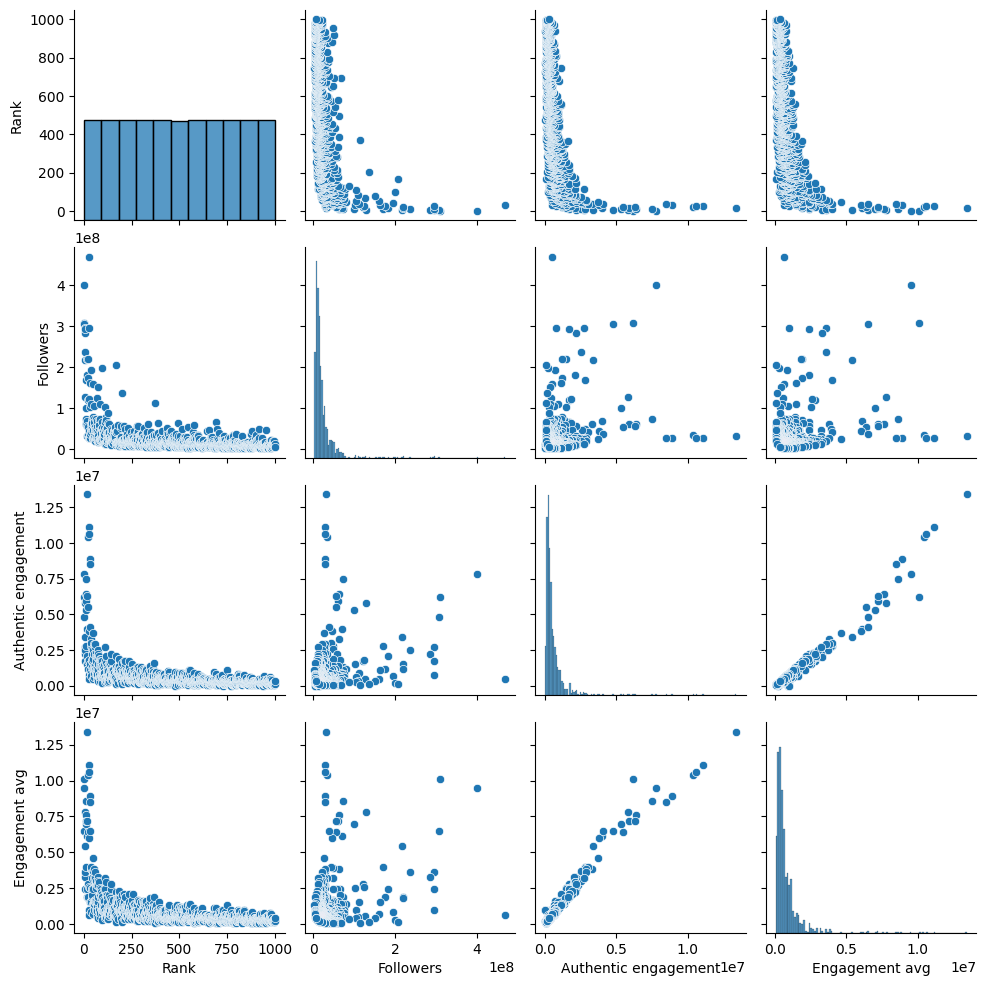

In [27]:
# 연속형 변수의 기초통계량을 살펴봅시다.
print(df.describe())

sns.pairplot(df[["Rank", "Followers", "Authentic engagement", "Engagement avg"]])

        Audience Country  count
0          United States    283
1                 Brazil    161
2                  India    143
3              Indonesia    130
4                 Mexico     50
5                  Spain     34
6                 Russia     30
7              Argentina     24
8                   Iran     17
9         United Kingdom     17
10                Turkey     16
11                 Italy     15
12           South Korea     13
13              Colombia      9
14           Philippines      7
15                France      6
16                 Egypt      6
17               Germany      5
18               Nigeria      4
19              Thailand      4
20                  Iraq      4
21               Morocco      3
22                 Japan      2
23          Saudi Arabia      2
24            Kazakhstan      2
25                 Syria      1
26                 China      1
27               Algeria      1
28  United Arab Emirates      1
29                Poland      1
30      

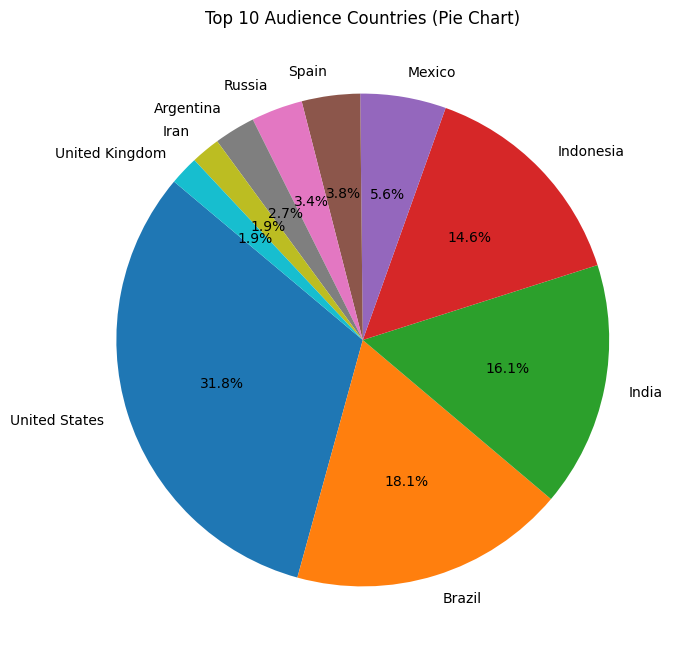

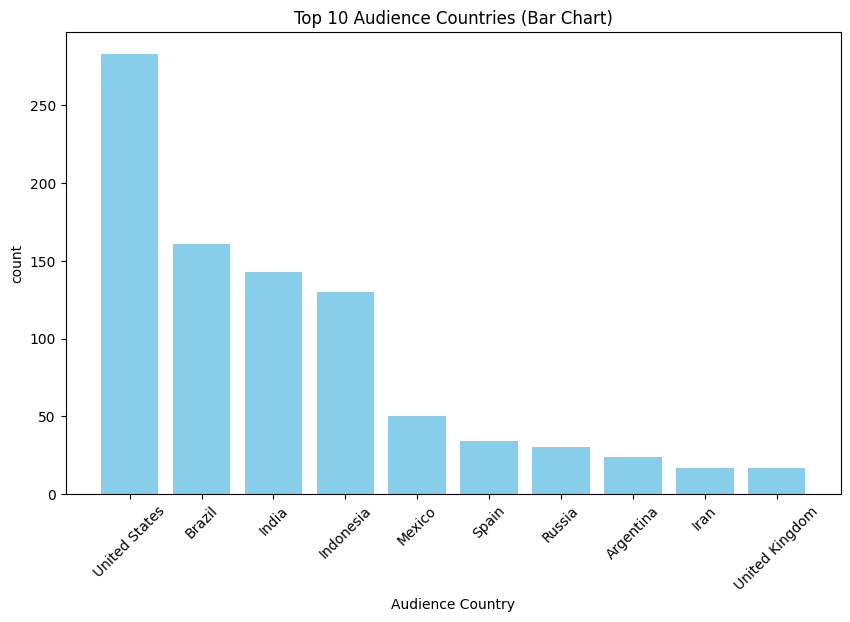

In [22]:
# 범주형 변수의 요약방법을 적용해봅시다.
country = df["Audience Country"].value_counts().reset_index()

# (1) 표
print(country)

# (2) 그래프

# 상위 10개국 데이터만 선택 (그래프 가독성을 위해)
top_10 = country.nlargest(10, 'count')

# 1. 원그래프
plt.figure(figsize=(8, 8))
plt.pie(top_10['count'], labels=top_10['Audience Country'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Audience Countries (Pie Chart)')
plt.show()

# 2. 막대그래프
plt.figure(figsize=(10, 6))
plt.bar(top_10['Audience Country'], top_10['count'], color='skyblue')
plt.xlabel('Audience Country')
plt.ylabel('count')
plt.title('Top 10 Audience Countries (Bar Chart)')
plt.xticks(rotation=45)
plt.show()

                             OLS Regression Results                             
Dep. Variable:     Authentic engagement   R-squared:                       0.966
Model:                              OLS   Adj. R-squared:                  0.966
Method:                   Least Squares   F-statistic:                 2.796e+04
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          22:15:03   Log-Likelihood:                 356.32
No. Observations:                   996   AIC:                            -708.6
Df Residuals:                       994   BIC:                            -698.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.627

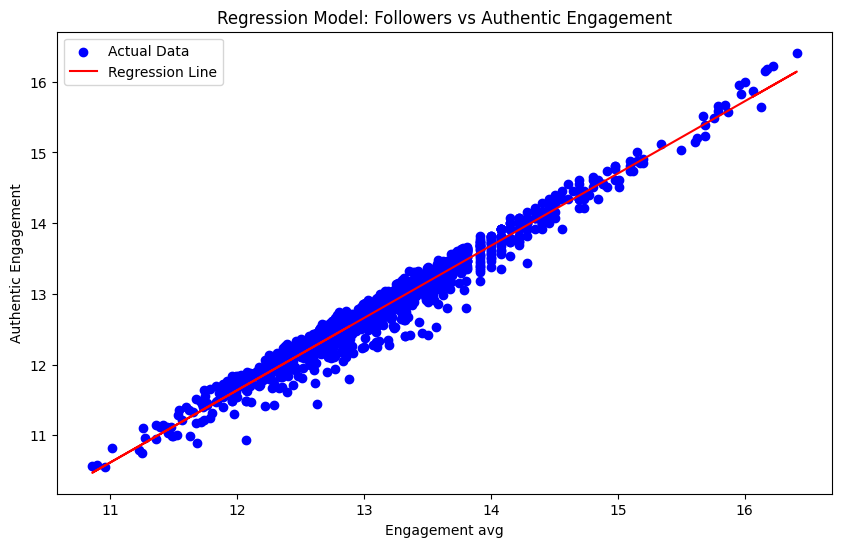

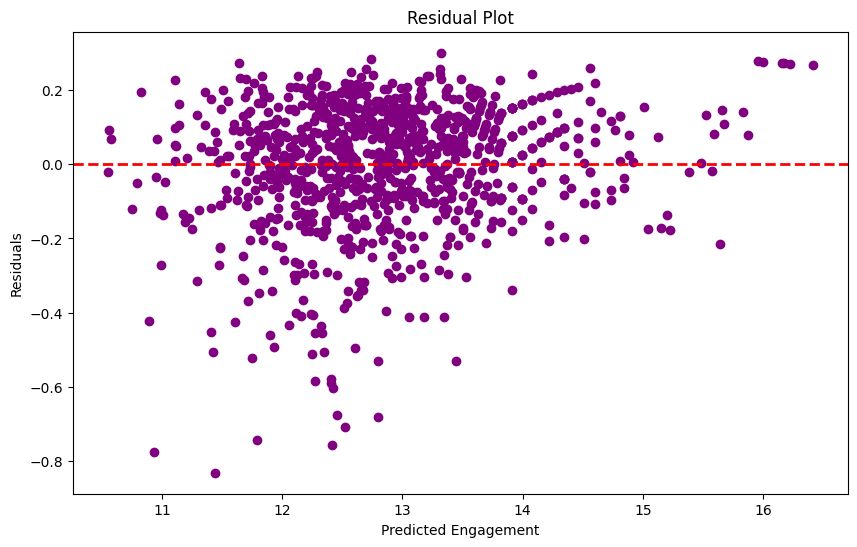

In [ ]:
# 이제 모형에 적합해봅시다.
# 데이터를 불러오는 것부터 시작해볼까요?
df = pd.read_csv('instagram.csv')

# 이상치들을 제거하는 코드입니다. 이상치 제거 전과 후를 비교해볼거에요.
# df = df.drop(index = [475, 727, 770, 937]).reset_index()

# 치우쳐진 분포를 완화시킬게요
X = np.log(df[["Engagement avg"]] + 1) 
y = np.log(df["Authentic engagement"] + 1) 

X = sm.add_constant(X)

# 모형 적합
model = sm.OLS(y, X).fit()

print(model.summary())

y_pred = model.predict(X)
residuals = y - y_pred

# plot
plt.figure(figsize=(10, 6))
plt.scatter(X["Engagement avg"], y, label="Actual Data", color="blue")
plt.plot(X["Engagement avg"], y_pred, label="Regression Line", color="red")
plt.xlabel("Engagement avg")
plt.ylabel("Authentic Engagement")
plt.title("Regression Model: Followers vs Authentic Engagement")
plt.legend()
plt.show()

# residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Engagement")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

                             OLS Regression Results                             
Dep. Variable:     Authentic engagement   R-squared:                       0.966
Model:                              OLS   Adj. R-squared:                  0.966
Method:                   Least Squares   F-statistic:                     9333.
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          22:16:36   Log-Likelihood:                 358.01
No. Observations:                   996   AIC:                            -708.0
Df Residuals:                       992   BIC:                            -688.4
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.877

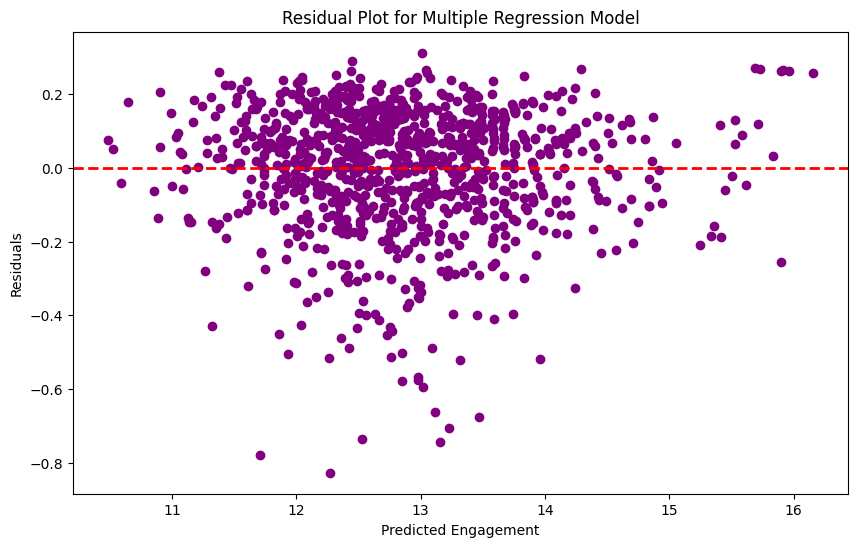

In [38]:
# 모형에 넣을 변수를 늘려볼까요?
X = np.log(df[["Followers", "Engagement avg"]] + 1)
y = np.log(df["Authentic engagement"] + 1)

rank = 1001 - df["Rank"]

X = pd.concat([X, rank], axis=1)

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

y_pred = model.predict(X)
residuals = y - y_pred

# residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Engagement")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Regression Model")
plt.show()


                             OLS Regression Results                             
Dep. Variable:     Authentic engagement   R-squared:                       0.977
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     1227.
Date:                  Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                          22:16:41   Log-Likelihood:                 551.33
No. Observations:                   996   AIC:                            -1035.
Df Residuals:                       962   BIC:                            -867.9
Df Model:                            33                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

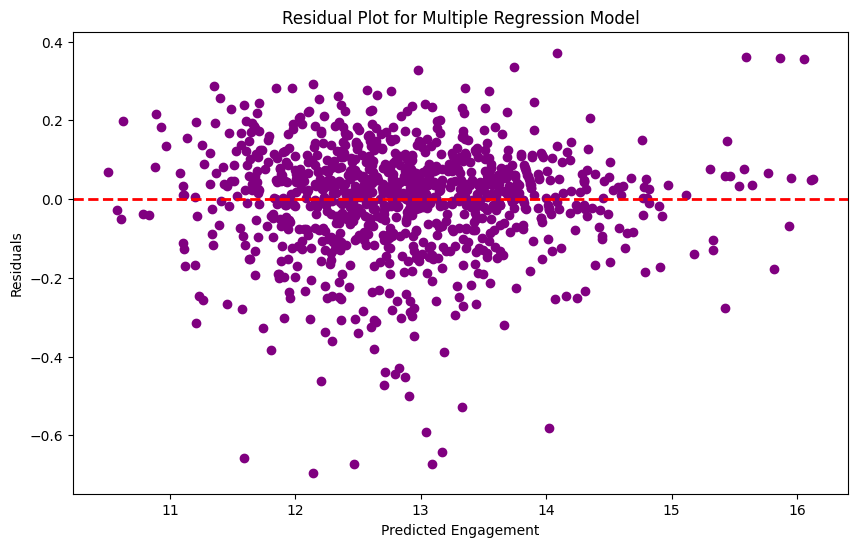

In [39]:
# 이번에는 "국가" 변수를 추가해볼까요?
X = np.log(df[["Followers", "Engagement avg"]] + 1) 
y = np.log(df["Authentic engagement"] + 1)

rank = 1001 - df["Rank"]

country_dummies = pd.get_dummies(df['Audience Country'], drop_first=True).astype(int)
X = pd.concat([X, rank, country_dummies], axis=1)

# fit the regression model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

y_pred = model.predict(X)
residuals = y - y_pred

# residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="purple")
plt.axhline(y=0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Engagement")
plt.ylabel("Residuals")
plt.title("Residual Plot for Multiple Regression Model")
plt.show()



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18856\3993481879.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster[numeric_features] = np.log(df_cluster[numeric_features] + 1)
c:\Users\jieun\anaconda3\envs\high\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18856\3993481879.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

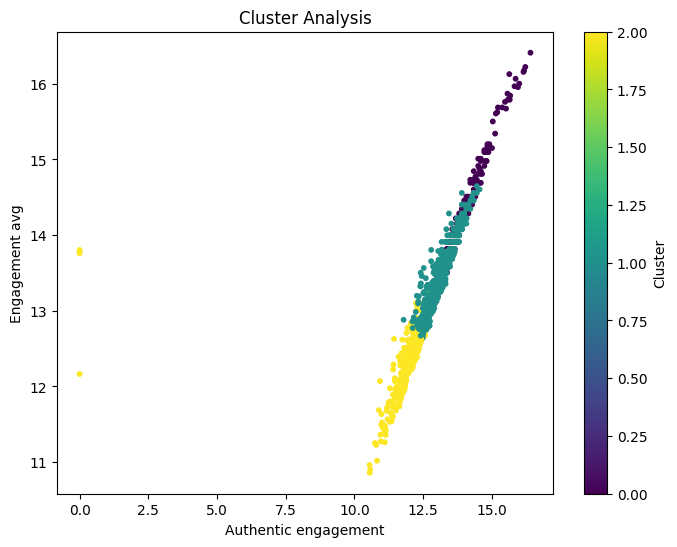

In [75]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# 데이터를 불러오고
df = pd.read_csv('instagram.csv')

# df = df.drop(index = [475, 727, 770, 937]).reset_index()

# 먼저 군집화에 사용할 데이터를 선정합니다.
df_cluster  = df[["Rank", "Followers", "Authentic engagement", "Engagement avg", "Audience Country"]]

# 1. 전처리 (수치형 표준화 + 범주형 인코딩)
numeric_features = ["Rank", "Followers", "Authentic engagement", "Engagement avg"]
categorical_features = ["Audience Country"]

df_cluster[numeric_features] = np.log(df_cluster[numeric_features] + 1)

# 파이프라인 구성
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features),
    ]
)

# 2. 데이터 변환
X = preprocessor.fit_transform(df_cluster)

# 3. K-means 모델 적용
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터 수는 3으로 설정
clusters = kmeans.fit_predict(X)

# 4. 결과 저장
df_cluster["Cluster"] = clusters

# 5. 시각화 (Followers vs. Engagement avg)
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster["Authentic engagement"], df_cluster["Engagement avg"], c = df_cluster["Cluster"], cmap = "viridis", s = 10)
plt.xlabel("Authentic engagement")
plt.ylabel("Engagement avg")
plt.title("Cluster Analysis")
plt.colorbar(label="Cluster")
plt.show()

<Figure size 1200x800 with 0 Axes>

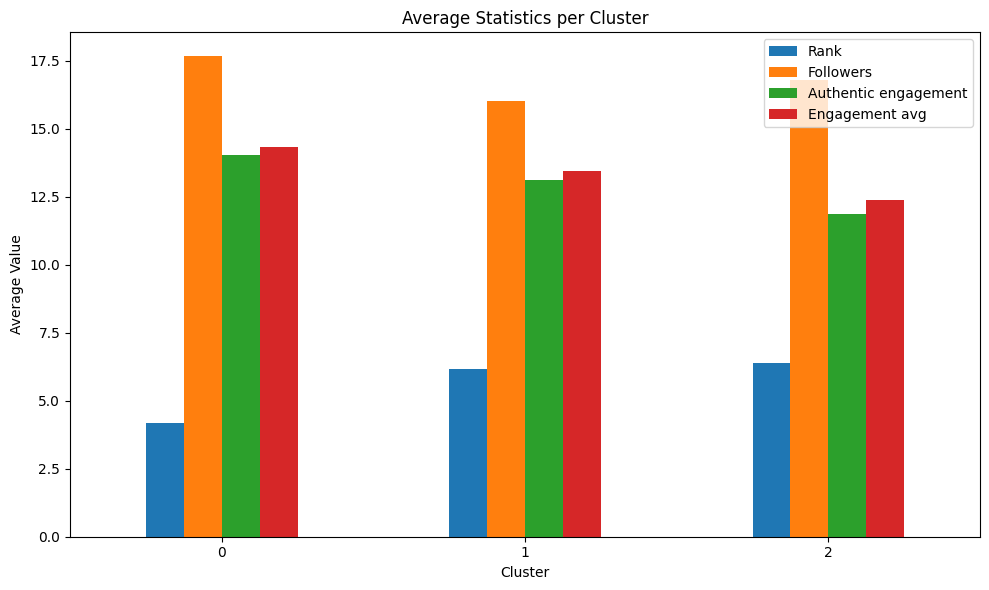

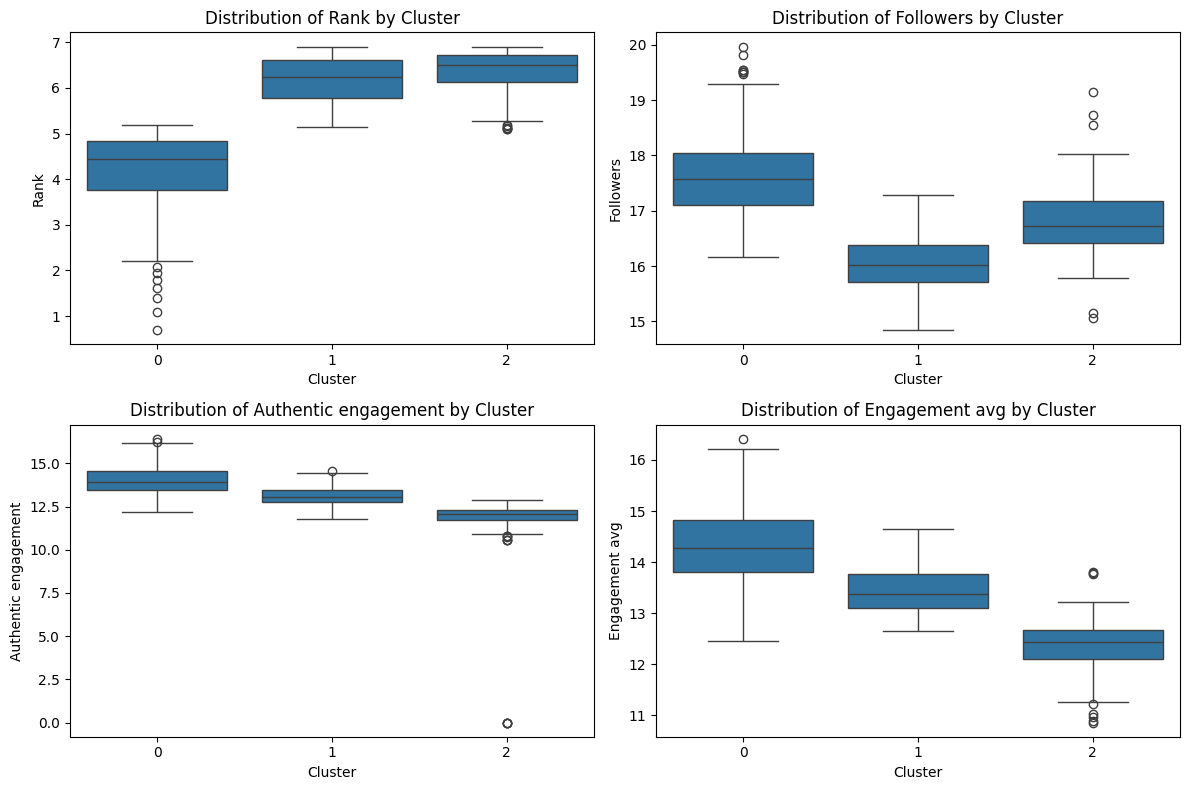

In [76]:
# 5. 군집별 평균 계산
df_cluster = df_cluster[numeric_features + ["Cluster"]]
cluster_means = df_cluster.groupby('Cluster').mean()

# 6. 군집별 통계 시각화

# (1) Bar Plot (군집별 평균)
plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', figsize=(10,6))
plt.title("Average Statistics per Cluster")
plt.ylabel("Average Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# (2) Box Plot (군집별 분포)
plt.figure(figsize=(12, 8))

# 박스플롯을 각 변수에 대해 그리고, 군집별로 나누기
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x="Cluster", y=feature, data=df_cluster)
    plt.title(f"Distribution of {feature} by Cluster")

plt.tight_layout()
plt.show()